In [109]:
import osiris_utils as utils
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import matplotlib as mpl
import pandas as pd
from tqdm import tqdm
plt.rcParams['font.size'] = 14

In [87]:
utils.time_estimation(40**3, 8**3, 0.3e-6, 50./0.288, 6, hours=False)

284.4444444444444

In [88]:
shot = "000055"
#shot = "000350"

species = "neg_electrons"

In [89]:
# read data 

folder_path = Path("/home/exxxx5/Tese/Decks/WeibelTestElectronsEI_B0_1/")

# neg_el = utils.OsirisGridFile(
#     folder_path / ("MS/DENSITY/" + species + "/charge/charge-" + species + "-" + shot + ".h5")
#     )

b1 = utils.OsirisGridFile(
    folder_path / ("MS/FLD/b1/b1-" + shot + ".h5")
    )

b2 = utils.OsirisGridFile(
    folder_path / ("MS/FLD/b2/b2-" + shot + ".h5")
    )

b3 = utils.OsirisGridFile(
    folder_path / ("MS/FLD/b3/b3-" + shot + ".h5")
    )

e1 = utils.OsirisGridFile(
    folder_path / ("MS/FLD/e1/e1-" + shot + ".h5")
    )

e2 = utils.OsirisGridFile(
    folder_path / ("MS/FLD/e2/e2-" + shot + ".h5")
    )

e3 = utils.OsirisGridFile(
    folder_path / ("MS/FLD/e3/e3-" + shot + ".h5")
    )

In [90]:
# read data 

folder_path_hot = Path("/home/exxxx5/Tese/Decks/WeibelTestElectronsEI_Hot_B0_1/")

# neg_el_Hot = utils.OsirisGridFile(
#     folder_path_hot / ("MS/DENSITY/" + species + "/charge/charge-" + species + "-" + shot + ".h5")
#     )

b1_Hot = utils.OsirisGridFile(
    folder_path_hot / ("MS/FLD/b1/b1-" + shot + ".h5")
    )

b2_Hot = utils.OsirisGridFile(
    folder_path_hot / ("MS/FLD/b2/b2-" + shot + ".h5")
    )

b3_Hot = utils.OsirisGridFile(
    folder_path_hot / ("MS/FLD/b3/b3-" + shot + ".h5")
    )

e1_Hot = utils.OsirisGridFile(
    folder_path_hot / ("MS/FLD/e1/e1-" + shot + ".h5")
    )

e2_Hot = utils.OsirisGridFile(
    folder_path_hot / ("MS/FLD/e2/e2-" + shot + ".h5")
    )

e3_Hot = utils.OsirisGridFile(
    folder_path_hot / ("MS/FLD/e3/e3-" + shot + ".h5")
    )

In [91]:
# Histograms

def plotHist(path, shot, key, ax):
    species="test_electrons"
    raw_data = utils.OsirisRawFile(
        path / ("MS/RAW/" + species + "/RAW-" + species + "-" + shot + ".h5")
        )
    
    counts, bins = np.histogram(raw_data.data[key], bins=500)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    bin_widths = bins[1:] - bins[:-1]
  
    # Normalize the counts by the bin width to ensure the same area
    normalized_counts = counts / bin_widths

    ax.plot(
        bin_centers, normalized_counts, 
        label=(r"$t={:.2f}$".format(raw_data.time[0]) + r"$\  [{}]$".format(raw_data.time[1]))
        )
    ax.set_xlabel(r"${}$".format(raw_data.axis[key]["long_name"]) + r"$\  [{}]$".format(raw_data.axis[key]["units"]))
    ax.legend()
    return ax

def compare_hists(path1, path2, key):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1 = plotHist(path1, "000350", key, ax1)
    ax2 = plotHist(path2, "000350", key, ax2)

    ax1 = plotHist(path1, "000380", key, ax1)
    ax2 = plotHist(path2, "000380", key, ax2)

    ax1 = plotHist(path1, "000410", key, ax1)
    ax2 = plotHist(path2, "000410", key, ax2)

    ax1 = plotHist(path1, "000440", key, ax1)
    ax2 = plotHist(path2, "000440", key, ax2)

    ax1 = plotHist(path1, "000470", key, ax1)
    ax2 = plotHist(path2, "000470", key, ax2)

    ax1 = plotHist(path1, "000500", key, ax1)
    ax2 = plotHist(path2, "000500", key, ax2)

    return ax1, ax2
    





In [92]:
# field and charge maps

def plot(data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for the first subplot
    im1 = ax1.imshow(data.data[:,:,40].T, aspect="auto", origin="lower", cmap="Reds", extent=[data.grid[0][0], data.grid[0][1], data.grid[1][0], data.grid[1][1]])
    cbar1 = fig.colorbar(im1, ax=ax1)
    cbar1.set_label(r"${}$".format(data.label) + r"$\  [{}]$".format(data.units))
    ax1.set_title(r"$t={:.2f}$".format(data.time[0]) + r"$\  [{}]$".format(data.time[1]))
    ax1.set_xlabel(r"${}$".format(data.axis[0]["long_name"]) + r"$\  [{}]$".format(data.axis[0]["units"]))
    ax1.set_ylabel(r"${}$".format(data.axis[1]["long_name"]) + r"$\  [{}]$".format(data.axis[1]["units"]))

    # Plot for the second subplot
    im2 = ax2.imshow(data.data[40,:,:].T, aspect="auto", origin="lower", cmap="Reds", extent=[data.grid[1][0], data.grid[1][1], data.grid[2][0], data.grid[2][1]])
    cbar2 = fig.colorbar(im2, ax=ax2)
    cbar2.set_label(r"${}$".format(data.label) + r"$\  [{}]$".format(data.units))
    ax2.set_title(r"$t={:.2f}$".format(data.time[0]) + r"$\  [{}]$".format(data.time[1]))
    ax2.set_xlabel(r"${}$".format(data.axis[1]["long_name"]) + r"$\  [{}]$".format(data.axis[1]["units"]))
    ax2.set_ylabel(r"${}$".format(data.axis[2]["long_name"]) + r"$\  [{}]$".format(data.axis[2]["units"]))

    return fig, ax1, ax2



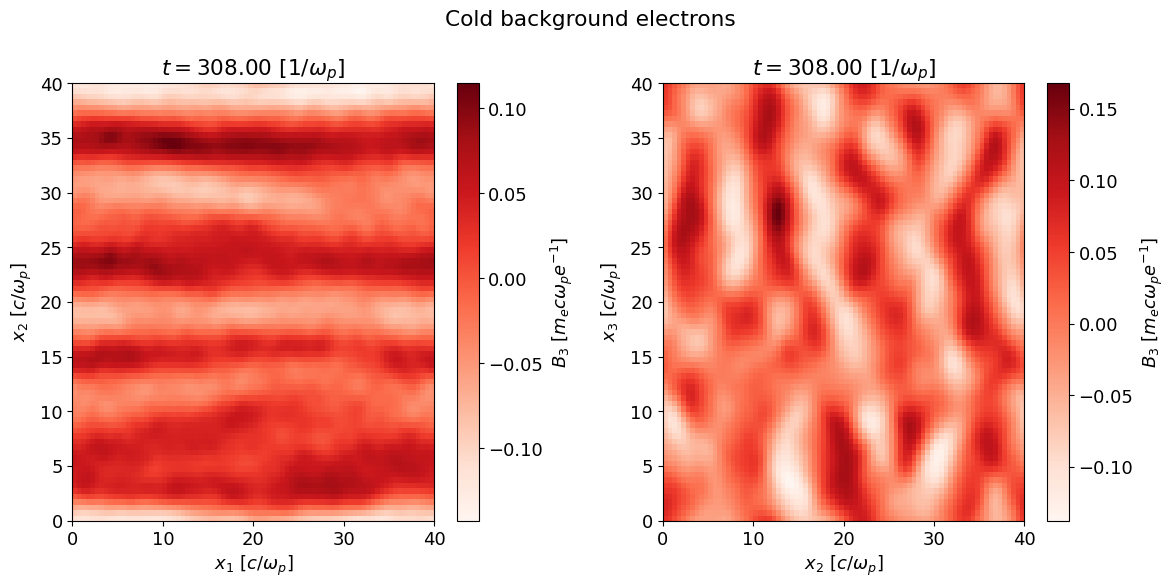

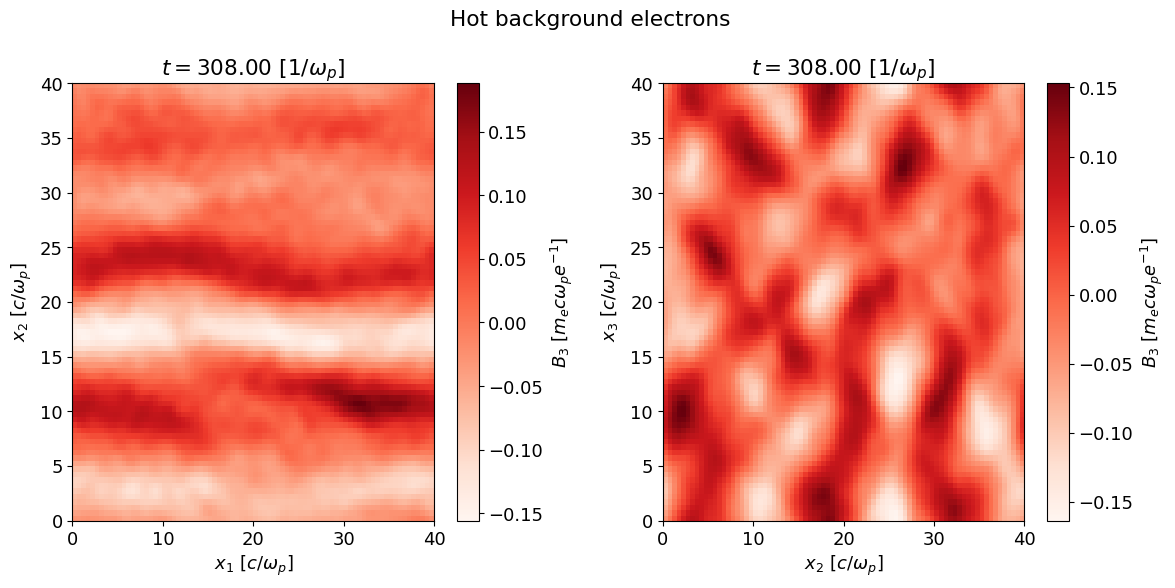

In [93]:
# field and charge maps

# fig, ax1, ax2 = plot(b3)
# fig.suptitle("No test electrons")
# plt.tight_layout()
# plt.show()

fig, ax1, ax2 = plot(b3)
fig.suptitle("Cold background electrons")
plt.tight_layout()
plt.show()

fig, ax1, ax2 = plot(b3_Hot)
fig.suptitle("Hot background electrons")
plt.tight_layout()
plt.show()




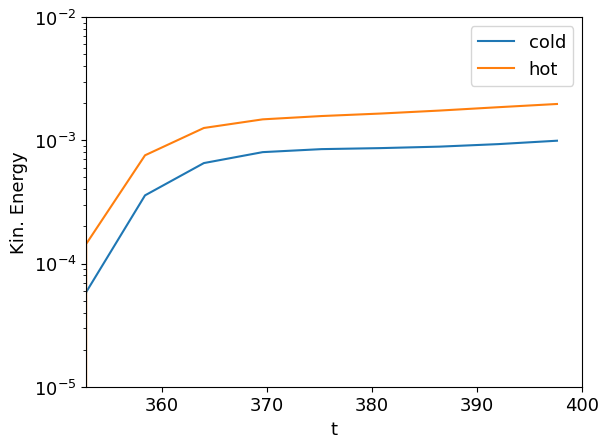

In [94]:
# Energy plots

# Define column names based on the header
column_names = ['Iter', 'Time', 'B1', 'B2', 'B3', 'E1', 'E2', 'E3']

# Read the data file
fields = pd.read_csv(folder_path / 'HIST/fld_ene'
                   , sep=r'\s+', skiprows=2, names=column_names)

fields_Hot = pd.read_csv(folder_path_hot / 'HIST/fld_ene'
                   , sep=r'\s+', skiprows=2, names=column_names)

column_names2 = [' Iter', 'Time', 'Total Par.', 'Kin. Energy']

ene = pd.read_csv(folder_path / 'HIST/par05_ene'
                   , sep=r'\s+', skiprows=2, names=column_names2)

ene_Hot = pd.read_csv(folder_path_hot / 'HIST/par05_ene'
                   , sep=r'\s+', skiprows=2, names=column_names2)

ax = plt.subplot()

ax.plot(ene['Time'], ene['Kin. Energy'], label = "cold")
ax.plot(ene_Hot['Time'], ene_Hot['Kin. Energy'], label = "hot")
ax.set_xlabel("t")
ax.set_xlim(352.8, 400)
ax.set_ylabel("Kin. Energy")
ax.set_ylim(1e-5, 1e-2)
ax.legend()
plt.yscale('log')
plt.show()

# ax = plt.subplot()
# sum = fields['Time']*0.
# for label in ['B1', 'B2', 'B3']:
#     ax.plot(fields['Time'], fields[label]**2, label=label+r"$^2$")
#     sum += fields[label]**2
# ax.plot(fields['Time'], sum, label="$B^2$")

# ax.plot(fields['Time'], 1*np.exp(2*0.4*fields['Time']))
# ax.legend()
# ax.set_xlabel("t")
# ax.set_ylabel("fld_ene")

# plt.yscale('log')
# plt.show()

# ax = plt.subplot()
# sum = fields['Time']*0.
# for label in ['E1', 'E2', 'E3']:
#     ax.plot(fields['Time'], fields[label]**2, label=label+r"$^2$")
#     sum += fields[label]**2
# ax.plot(fields['Time'], sum, label="$E^2$")
# ax.legend()
# ax.set_xlabel("t")
# ax.set_ylabel("fld_ene")
# plt.yscale('log')
# plt.show()

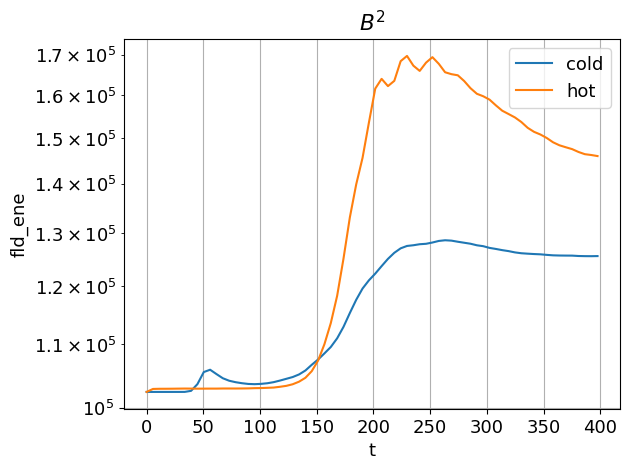

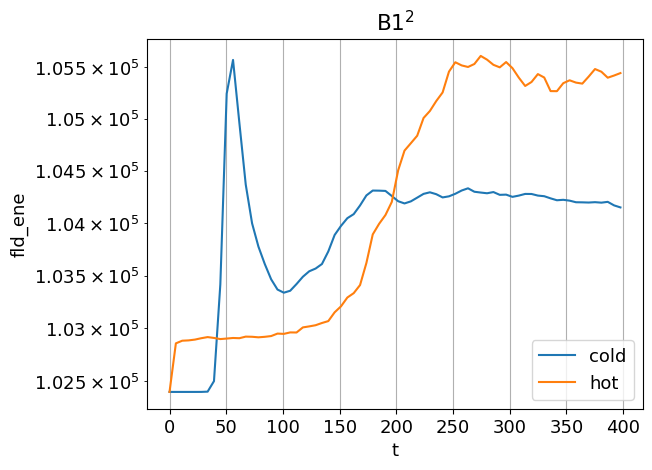

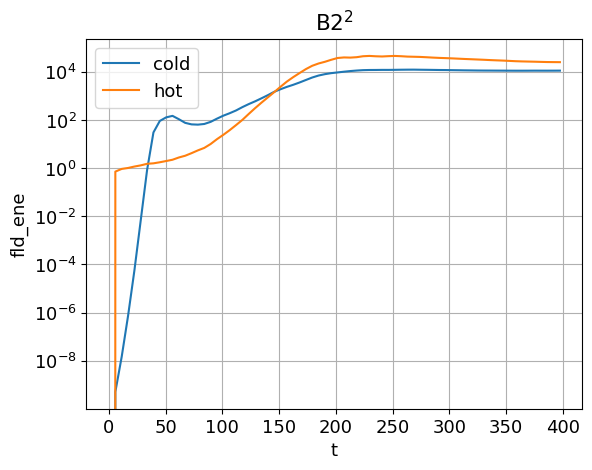

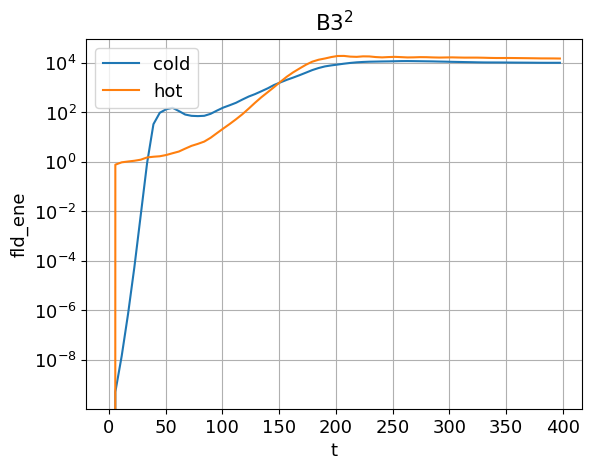

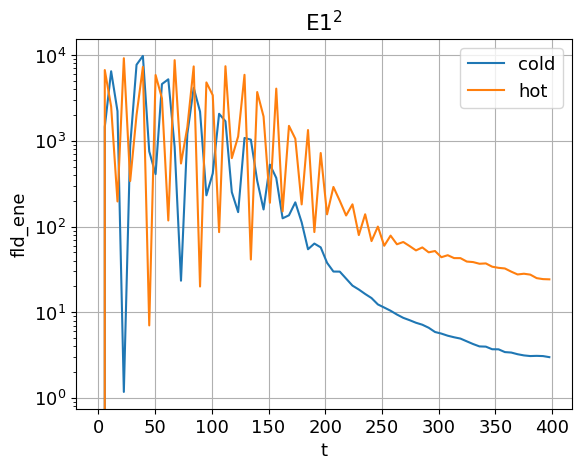

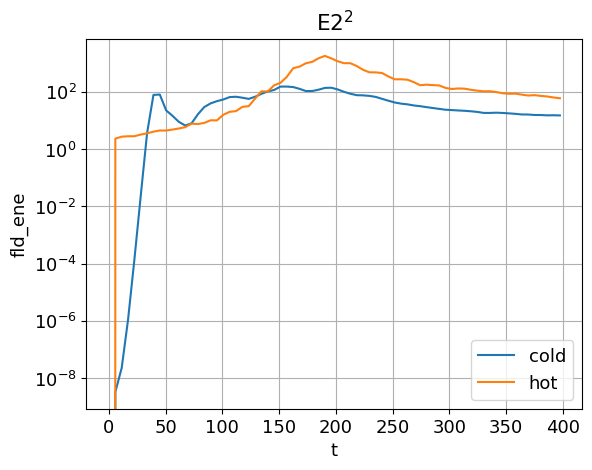

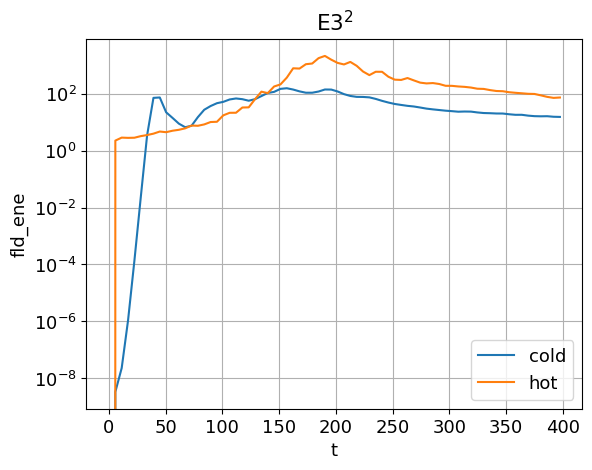

In [95]:

ax = plt.subplot()
ax.plot(fields['Time'], fields["B1"]**2 + fields["B2"]**2 + fields["B3"]**2, label="cold")
ax.plot(fields_Hot['Time'], fields_Hot["B1"]**2 + fields_Hot["B2"]**2 + fields_Hot["B3"]**2, label="hot")

#ax.plot(fields['Time'][0:200], 1*np.exp(2*0.4*fields['Time'])[0:200], label=r"$1*e^{(2*0.4*t)}$")
ax.set_title(r"$B^2$")
plt.yscale('log')
ax.legend()
ax.set_xlabel("t")
ax.set_ylabel("fld_ene")
ax.grid()
#ax.set_xlim(350,400)
#ax.set_ylim(1.25e5,1.27e5)

plt.show()

for label in ['B1', 'B2', 'B3', 'E1', 'E2', 'E3']:
    ax = plt.subplot()
    ax.plot(fields['Time'], fields[label]**2, label="cold")
    ax.plot(fields_Hot['Time'], fields_Hot[label]**2, label="hot")

    #ax.plot(fields['Time'][0:200], 1*np.exp(2*0.4*fields['Time'])[0:200], label=r"$1*e^{(2*0.4*t)}$")
    ax.set_title(label+r"$^2$")
    ax.legend()
    ax.set_xlabel("t")
    ax.set_ylabel("fld_ene")
    ax.grid()
    plt.yscale('log')
    plt.show()

In [96]:
80**3 *8

4096000

In [ ]:
b1_grid = b1.yeeToCellCorner()
b2_grid = b2.yeeToCellCorner()
b3_grid = b3.yeeToCellCorner()
e1_grid = e1.yeeToCellCorner()
e2_grid = e2.yeeToCellCorner()
e3_grid = e3.yeeToCellCorner()

b2 = b1_grid * b1_grid + b2_grid * b2_grid + b3_grid * b3_grid
b = np.sqrt(b2)

e_par = np.abs(e1_grid * b1_grid + e2_grid * b2_grid + e3_grid * b3_grid / b)

e2 = e1_grid * e1_grid + e2_grid * e2_grid + e3_grid * e3_grid
e = np.sqrt(e2)
e_perp =  np.sqrt(e2 - e_par * e_par )


In [118]:
def plot_grid_centred(data, label):

    vminmax = max([abs(np.max(data)), abs(np.min(data))])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for the first subplot
    im1 = ax1.imshow(data[:,:,40].T, aspect="auto", origin="lower", cmap="Reds", extent=[b1.grid[0][0], b1.grid[0][1], b1.grid[1][0], b1.grid[1][1]])
    cbar1 = fig.colorbar(im1, ax=ax1)
    cbar1.set_label(label)
    ax1.set_title(r"$t={:.2f}$".format(b1.time[0]) + r"$\  [{}]$".format(b1.time[1]))
    ax1.set_xlabel(r"${}$".format(b1.axis[0]["long_name"]) + r"$\  [{}]$".format(b1.axis[0]["units"]))
    ax1.set_ylabel(r"${}$".format(b1.axis[1]["long_name"]) + r"$\  [{}]$".format(b1.axis[1]["units"]))


    # Plot for the second subplot
    im2 = ax2.imshow(data[40,:,:].T, aspect="auto", origin="lower", cmap="Reds", extent=[b1.grid[1][0], b1.grid[1][1], b1.grid[2][0], b1.grid[2][1]])
    cbar2 = fig.colorbar(im2, ax=ax2)
    cbar2.set_label(label)
    ax2.set_title(r"$t={:.2f}$".format(b1.time[0]) + r"$\  [{}]$".format(b1.time[1]))
    ax2.set_xlabel(r"${}$".format(b1.axis[1]["long_name"]) + r"$\  [{}]$".format(b1.axis[1]["units"]))
    ax2.set_ylabel(r"${}$".format(b1.axis[2]["long_name"]) + r"$\  [{}]$".format(b1.axis[2]["units"]))

    return fig, ax1, ax2

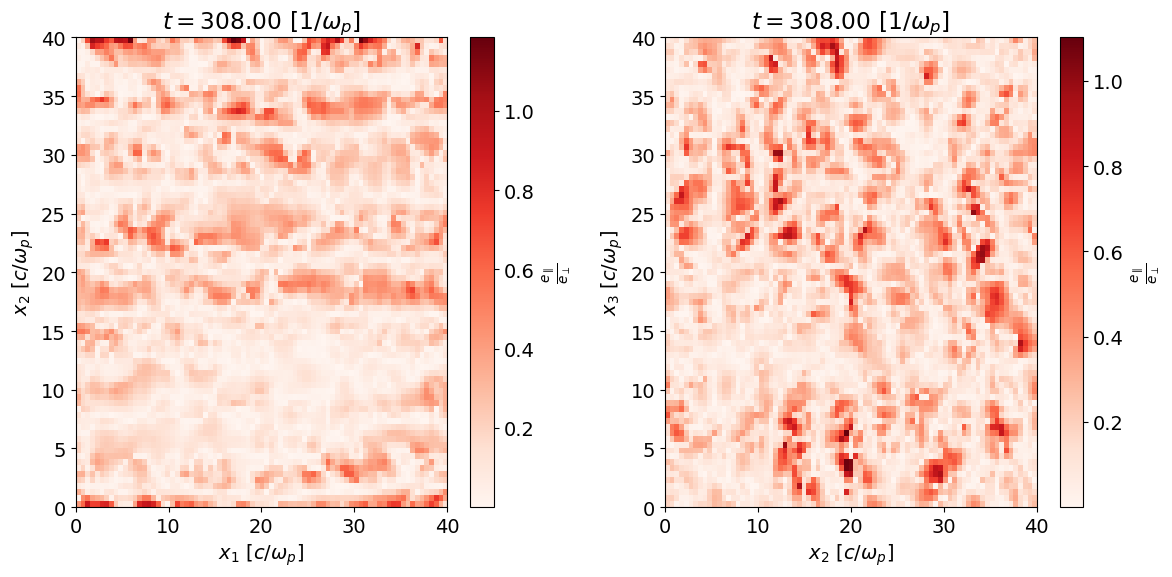

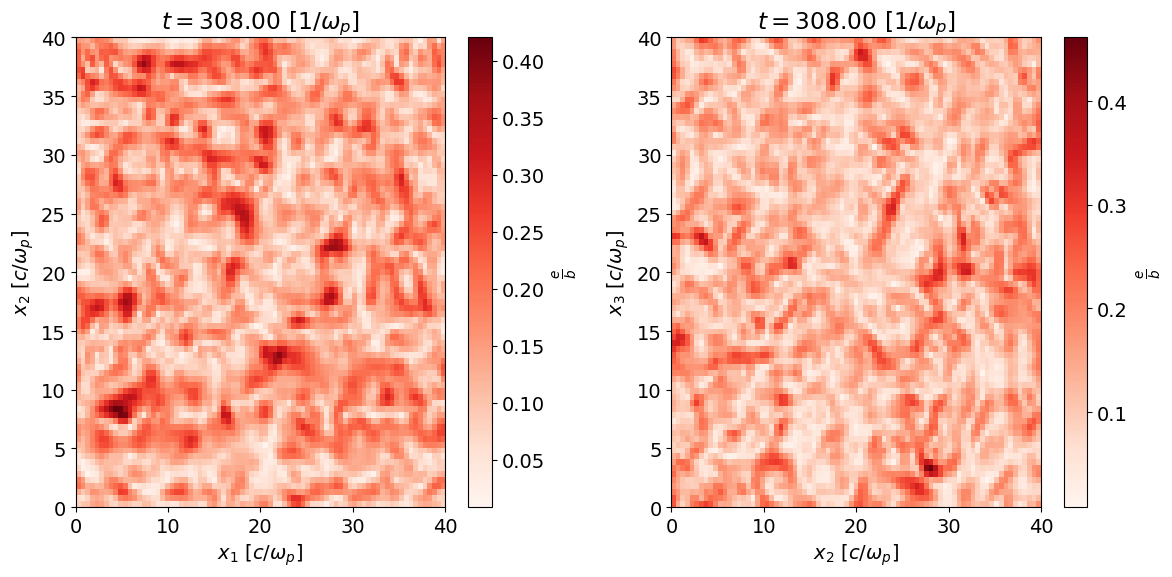

In [119]:
fig, ax1, ax2 = plot_grid_centred(e_par/e_perp, r"$\frac{e_{\parallel}}{e_{\perp}}$")
plt.tight_layout()
plt.show()

fig, ax1, ax2 = plot_grid_centred(e/b, r"$\frac{e}{b}$")
plt.tight_layout()
plt.show()